!pip install pyfolio

In [2]:
import pyfolio as pf

C:\Users\Public\anaconda3\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [3]:
import pandas as pd
import pandas_datareader as pdr

import datetime as dt
from datetime import date
import yfinance as yf

In [4]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import subplots, show, plotting

In [5]:
import numpy as np

In [6]:
import statsmodels.api as sm

## Downloading Data

##### CoinGecko.com

In [7]:
BTC = pd.read_csv("C:\\Users\\Pedro Martinez\\Documents\\Crypto\\_data\\coingecko\\btc-usd-max.csv",
                 index_col=0)
BTC.columns = ['BTC_price', 'BTC_market_cap', 'total_volume']
BTC.head(2)

,BTC_price,BTC_market_cap,total_volume
snapped_at,,,
2013-04-28 00:00:00 UTC,135.30,1.500518e+09,0.0
2013-04-29 00:00:00 UTC,141.96,1.575032e+09,0.0


In [8]:
ETH = pd.read_csv("C:\\Users\\Pedro Martinez\\Documents\\Crypto\\_data\\coingecko\\eth-usd-max.csv",
                 index_col=0)
ETH.columns = ['ETH_price', 'ETH_market_cap', 'total_volume']
ETH.head(2)

,ETH_price,ETH_market_cap,total_volume
snapped_at,,,
2015-08-07 00:00:00 UTC,2.83162,0.0,90622.0
2015-08-08 00:00:00 UTC,1.33075,80339475.0,368070.0


In [9]:
ADA = pd.read_csv("C:\\Users\\Pedro Martinez\\Documents\\Crypto\\_data\\coingecko\\ada-usd-max.csv",
                 index_col=0)
ADA.columns = ['ADA_price', 'ADA_market_cap', 'total_volume']
ADA.head(2)

,ADA_price,ADA_market_cap,total_volume
snapped_at,,,
2017-10-18 00:00:00 UTC,0.026845,6.960214e+08,2.351678e+06
2017-10-19 00:00:00 UTC,0.026830,6.956220e+08,2.815156e+06


In [10]:
BNB = pd.read_csv("C:\\Users\\Pedro Martinez\\Documents\\Crypto\\_data\\coingecko\\bnb-usd-max.csv",
                 index_col=0)
BNB.columns = ['BNB_price', 'BNB_market_cap', 'total_volume']
BNB.head(2)

,BNB_price,BNB_market_cap,total_volume
snapped_at,,,
2017-09-16 00:00:00 UTC,0.107251,1.072506e+07,1.051223
2017-09-17 00:00:00 UTC,0.154041,1.540413e+07,14.678587


In [11]:
USDT = pd.read_csv("C:\\Users\\Pedro Martinez\\Documents\\Crypto\\_data\\coingecko\\usdt-usd-max.csv",
                  index_col=0)
USDT.columns = ['USDT_price', 'USDT_market_cap', 'total_volume']
USDT.head(2)

,USDT_price,USDT_market_cap,total_volume
snapped_at,,,
2015-02-25 00:00:00 UTC,1.210160,304476.0,5.0
2015-03-02 00:00:00 UTC,0.572521,144046.0,2.0


In [12]:
XRP =  pd.read_csv("C:\\Users\\Pedro Martinez\\Documents\\Crypto\\_data\\coingecko\\xrp-usd-max.csv",
                  index_col=0)
XRP.columns = ['XRP_price', 'XRP_market_cap', 'total_volume']
XRP.head(2)

,XRP_price,XRP_market_cap,total_volume
snapped_at,,,
2013-08-04 00:00:00 UTC,0.005874,45921034.0,0.0
2013-08-05 00:00:00 UTC,0.005653,44191247.0,0.0


In [13]:
SOL = pd.read_csv("C:\\Users\\Pedro Martinez\\Documents\\Crypto\\_data\\coingecko\\sol-usd-max.csv",
                  index_col=0)
SOL.columns = ['SOL_price', 'SOL_market_cap', 'total_volume']
SOL.head(2)

,SOL_price,SOL_market_cap,total_volume
snapped_at,,,
2020-04-11 00:00:00 UTC,0.957606,7.827652e+06,9.267267e+07
2020-04-12 00:00:00 UTC,0.784711,6.173608e+06,4.945869e+07


In [14]:
DOT = pd.read_csv("C:\\Users\\Pedro Martinez\\Documents\\Crypto\\_data\\coingecko\\dot-usd-max.csv",
                  index_col=0)
DOT.columns = ['DOT_price', 'DOT_market_cap', 'total_volume']
DOT.head(2)

,DOT_price,DOT_market_cap,total_volume
snapped_at,,,
2020-08-19 00:00:00 UTC,2.936665,0.0,8.241398e+07
2020-08-20 00:00:00 UTC,2.936665,0.0,8.241398e+07


In [15]:
USDC =  pd.read_csv("C:\\Users\\Pedro Martinez\\Documents\\Crypto\\_data\\coingecko\\usdc-usd-max.csv",
                    index_col=0)
USDC.columns = ['USDC_price', 'USDC_market_cap', 'total_volume']
USDC.head(2)

,USDC_price,USDC_market_cap,total_volume
snapped_at,,,
2018-10-05 00:00:00 UTC,1.006242,0.0,31264.420430
2018-10-06 00:00:00 UTC,1.001530,0.0,20254.712255


In [16]:
DOGE =  pd.read_csv("C:\\Users\\Pedro Martinez\\Documents\\Crypto\\_data\\coingecko\\doge-usd-max.csv",
                    index_col=0)
DOGE.columns = ['DOGE_price', 'DOGE_market_cap', 'total_volume']
DOGE.head(2)

,DOGE_price,DOGE_market_cap,total_volume
snapped_at,,,
2013-12-15 00:00:00 UTC,0.000559,3488670.0,0.0
2013-12-17 00:00:00 UTC,0.000218,1619159.0,0.0


In [17]:
df = BTC.iloc[:,:2].join(
    [
        ETH.iloc[:,:2],
        ADA.iloc[:,:2],
        USDT.iloc[:,:2],
        BNB.iloc[:,:2],
        XRP.iloc[:,:2],
        SOL.iloc[:,:2],
        DOT.iloc[:,:2],
        USDC.iloc[:,:2],
        DOGE.iloc[:,:2]
    ],
    how='left')

In [18]:
df.head(3)

,BTC_price,BTC_market_cap,ETH_price,ETH_market_cap,ADA_price,ADA_market_cap,USDT_price,USDT_market_cap,BNB_price,BNB_market_cap,XRP_price,XRP_market_cap,SOL_price,SOL_market_cap,DOT_price,DOT_market_cap,USDC_price,USDC_market_cap,DOGE_price,DOGE_market_cap
snapped_at,,,,,,,,,,,,,,,,,,,,
2013-04-28 00:00:00 UTC,135.30,1.500518e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-29 00:00:00 UTC,141.96,1.575032e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-30 00:00:00 UTC,135.30,1.501657e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df.tail(3)

,BTC_price,BTC_market_cap,ETH_price,ETH_market_cap,ADA_price,ADA_market_cap,USDT_price,USDT_market_cap,BNB_price,BNB_market_cap,XRP_price,XRP_market_cap,SOL_price,SOL_market_cap,DOT_price,DOT_market_cap,USDC_price,USDC_market_cap,DOGE_price,DOGE_market_cap
snapped_at,,,,,,,,,,,,,,,,,,,,
2021-10-08 00:00:00 UTC,53894.595995,1.015247e+12,3594.918358,4.236103e+11,2.279964,7.298744e+10,1.001979,6.915368e+10,439.932647,6.786652e+10,1.068941,5.003262e+10,154.259885,4.614561e+10,33.831460,3.507208e+10,1.001849,3.266387e+10,0.243439,3.203584e+10
2021-10-09 00:00:00 UTC,54010.937474,1.016651e+12,3558.549577,4.199184e+11,2.230678,7.158880e+10,1.001943,6.926980e+10,418.317343,6.477379e+10,1.061465,4.957467e+10,158.914611,4.734586e+10,33.370045,3.462050e+10,0.999616,3.294107e+10,0.242968,3.201244e+10
2021-10-10 00:00:00 UTC,55125.460338,1.038525e+12,3588.080922,4.218362e+11,2.269474,7.276435e+10,1.001848,6.927262e+10,422.312500,6.523291e+10,1.164185,5.450031e+10,157.335421,4.717785e+10,36.373698,3.780235e+10,1.002241,3.301935e+10,0.247164,3.254691e+10


# #####

In [20]:
crypto_list = pd.read_excel('Top100Crypto List.xlsx',
                            sheet_name='Sheet1',
                            header=None)

In [21]:
crypto_list = pd.read_csv('Top100Crypto List_YFinance.csv')

In [22]:
crypto_list = crypto_list.iloc[:,0]
crypto_list

0       BTC-USD
1       ETH-USD
2       HEX-USD
3      USDT-USD
4       ADA-USD
5       BNB-USD
6       XRP-USD
7      SOL1-USD
8      USDC-USD
9      DOT1-USD
10     DOGE-USD
11    LUNA1-USD
12     AVAX-USD
13     UNI3-USD
14     LINK-USD
15      LTC-USD
16     ALGO-USD
17      BCH-USD
18    ATOM1-USD
19    MATIC-USD
20     ICP1-USD
21      XLM-USD
22      FIL-USD
23      TRX-USD
24      ETC-USD
25      VET-USD
26      XTZ-USD
27    THETA-USD
28      XMR-USD
29     EGLD-USD
30      CRO-USD
31      EOS-USD
32     AAVE-USD
33      QNT-USD
34     HBAR-USD
35    MIOTA-USD
36     GRT2-USD
37     SHIB-USD
38      KSM-USD
39      NEO-USD
40    WAVES-USD
41      BSV-USD
42      MKR-USD
43     BTT1-USD
44     AMP1-USD
45     CCXX-USD
46     CELO-USD
47     DASH-USD
48     HNT1-USD
49     COMP-USD
Name: Symbol, dtype: object

In [23]:
crypto_list = crypto_list.values

In [24]:
# Merging elements from list
cryptos = ' '.join(crypto_list)
cryptos

'BTC-USD ETH-USD HEX-USD USDT-USD ADA-USD BNB-USD XRP-USD SOL1-USD USDC-USD DOT1-USD DOGE-USD LUNA1-USD AVAX-USD UNI3-USD LINK-USD LTC-USD ALGO-USD BCH-USD ATOM1-USD MATIC-USD ICP1-USD XLM-USD FIL-USD TRX-USD ETC-USD VET-USD XTZ-USD THETA-USD XMR-USD EGLD-USD'

In [25]:
start = dt.datetime(2021, 9, 30)
end =   dt.datetime(2021, 10, 8)

In [26]:
# download top 30
hist = yf.download(cryptos,start,end,interval='1d')['Adj Close']

[*********************100%***********************]  30 of 30 completed


In [27]:
hist

,ADA-USD,ALGO-USD,ATOM1-USD,AVAX-USD,BCH-USD,BNB-USD,BTC-USD,DOGE-USD,DOT1-USD,EGLD-USD,...,THETA-USD,TRX-USD,UNI3-USD,USDC-USD,USDT-USD,VET-USD,XLM-USD,XMR-USD,XRP-USD,XTZ-USD
Date,,,,,,,,,,,,,,,,,,,,,
2021-09-30,2.114452,1.628595,36.212109,66.765884,502.503632,387.057343,43790.894531,0.204244,28.580620,210.306763,...,5.049012,0.089426,23.527054,1.000140,1.000155,0.095127,0.278811,250.824753,0.952636,6.077872
2021-10-01,2.258127,1.774298,37.837257,67.570396,543.302734,421.643188,48116.941406,0.223010,31.968777,241.814880,...,5.999210,0.094732,25.636082,0.999545,1.000178,0.108098,0.300391,257.825775,1.042624,6.698933
2021-10-02,2.251459,1.777467,38.756966,69.220490,552.628357,428.098328,47711.488281,0.219133,32.122108,245.886902,...,6.070121,0.093627,26.178560,0.999790,1.000284,0.111451,0.316975,253.230392,1.038675,7.364315
2021-10-03,2.252873,1.987661,38.790665,68.717041,570.499329,430.508820,48199.953125,0.221748,32.105255,254.427124,...,6.109808,0.094981,26.004129,0.999681,1.000201,0.110494,0.315097,259.007904,1.055170,8.703033
2021-10-04,2.189235,1.933079,36.717442,65.159843,551.597046,425.748901,49112.902344,0.240852,31.042126,239.371277,...,6.003510,0.093507,25.303267,0.999416,0.999838,0.109266,0.309655,264.044617,1.043004,8.339909
2021-10-05,2.233124,1.953356,36.730343,64.650116,594.042542,442.706146,51514.812500,0.252016,31.427458,244.733612,...,6.727714,0.096183,25.664791,0.999849,1.000440,0.113367,0.319084,270.752197,1.085503,7.973679
2021-10-06,2.212155,1.819466,35.211025,60.114075,618.740845,435.401367,55361.449219,0.255134,32.289612,230.838150,...,6.422086,0.095521,25.287689,0.999990,1.000317,0.112323,0.354442,286.570801,1.077656,7.779138
2021-10-07,2.276995,1.888237,36.727562,61.488354,612.156738,438.761749,53805.984375,0.242923,33.974548,242.944931,...,6.502927,0.095514,25.535185,1.000023,1.000375,0.111690,0.344107,277.862671,1.068026,7.628819
2021-10-08,2.237176,1.899197,34.983521,60.520226,595.772644,419.102051,53967.847656,0.243851,33.372894,257.671814,...,6.458604,0.097670,24.767910,0.999791,1.000116,0.111526,0.335812,277.920166,1.062891,7.292932


In [28]:
## changing labels to show only ticker
columns = hist.columns

In [29]:
labels=[]
for column in columns:
    labels.append(column[:-4])

In [30]:
hist.columns = labels

# #

### Market Cap

In [31]:
history = pd.read_json(r"C:\\Users\\Pedro Martinez\\Documents\\Crypto\\_data\\historical.json")

In [32]:
history.head(8)

,status,data
timestamp,2021-10-11T18:13:52.094Z,NaN
error_code,0,NaN
error_message,None,NaN
elapsed,272,NaN
credit_count,0,NaN
notice,None,NaN
2013-04-28T18:47:00.000Z,NaN,"[91346896, 0]"
2013-04-29T18:12:00.000Z,NaN,"[94729800, 0]"


In [33]:
history = history[['data']][6:]
history.head()

,data
2013-04-28T18:47:00.000Z,"[91346896, 0]"
2013-04-29T18:12:00.000Z,"[94729800, 0]"
2013-04-30T18:12:00.000Z,"[92358000, 0]"
2013-05-01T18:12:00.000Z,"[85532000, 0]"
2013-05-02T18:12:00.000Z,"[73945696, 0]"


In [34]:
type(history.data[0])

list

In [35]:
for i in range(0,len(history.index)):
    history.loc[history.index[i],'MktCap'] = (history.iloc[i,0])[0]
    history.loc[history.index[i],'Vol'] = (history.iloc[i,0])[1]

In [36]:
history.head(3)

,data,MktCap,Vol
2013-04-28T18:47:00.000Z,"[91346896, 0]",91346896.0,0.0
2013-04-29T18:12:00.000Z,"[94729800, 0]",94729800.0,0.0
2013-04-30T18:12:00.000Z,"[92358000, 0]",92358000.0,0.0


In [37]:
history.tail(3)

,data,MktCap,Vol
2021-10-09T18:14:10.999Z,"[1288921245444.0254, 66509677994.404015]",1.288921e+12,6.650968e+10
2021-10-10T18:14:10.999Z,"[1266649017695.8943, 56740519078.25234]",1.266649e+12,5.674052e+10
2021-10-11T18:14:10.999Z,"[1254539056568.5884, 65170373429.70095]",1.254539e+12,6.517037e+10


In [38]:
mkt_cap = history[['MktCap']]
mkt_cap

,MktCap
2013-04-28T18:47:00.000Z,9.134690e+07
2013-04-29T18:12:00.000Z,9.472980e+07
2013-04-30T18:12:00.000Z,9.235800e+07
2013-05-01T18:12:00.000Z,8.553200e+07
2013-05-02T18:12:00.000Z,7.394570e+07
...,...
2021-10-07T18:14:10.999Z,1.273249e+12
2021-10-08T18:14:10.999Z,1.286656e+12
2021-10-09T18:14:10.999Z,1.288921e+12
2021-10-10T18:14:10.999Z,1.266649e+12


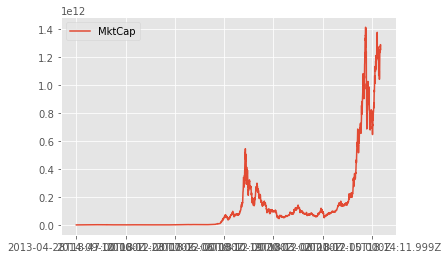

In [39]:
mkt_cap.plot()

### Assumption

In [40]:
df['MarketCap'] = df[ df.columns[df.columns.str.contains('market_cap')].values ].sum(axis=1)

In [200]:
df.head(2)

,ADA,ALGO,ATOM1,AVAX,BCH,BNB,BTC,DOGE,DOT1,EGLD,...,UNI3,USDC,USDT,VET,XLM,XMR,XRP,XTZ,MktCap,Rf
Date,,,,,,,,,,,,,,,,,,,,,
2014-09-17,NaN,NaN,NaN,NaN,NaN,NaN,457.334015,0.000268,NaN,NaN,...,NaN,NaN,NaN,NaN,0.003072,1.76835,0.005399,NaN,607211008.0,0.013
2014-09-18,NaN,NaN,NaN,NaN,NaN,NaN,424.440002,0.000298,NaN,NaN,...,NaN,NaN,NaN,NaN,0.003456,1.56928,0.005135,NaN,606553984.0,0.010


In [41]:
df.tail(2)

,BTC_price,BTC_market_cap,ETH_price,ETH_market_cap,ADA_price,ADA_market_cap,USDT_price,USDT_market_cap,BNB_price,BNB_market_cap,...,XRP_market_cap,SOL_price,SOL_market_cap,DOT_price,DOT_market_cap,USDC_price,USDC_market_cap,DOGE_price,DOGE_market_cap,MarketCap
snapped_at,,,,,,,,,,,,,,,,,,,,,
2021-10-09 00:00:00 UTC,54010.937474,1.016651e+12,3558.549577,4.199184e+11,2.230678,7.158880e+10,1.001943,6.926980e+10,418.317343,6.477379e+10,...,4.957467e+10,158.914611,4.734586e+10,33.370045,3.462050e+10,0.999616,3.294107e+10,0.242968,3.201244e+10,1.838696e+12
2021-10-10 00:00:00 UTC,55125.460338,1.038525e+12,3588.080922,4.218362e+11,2.269474,7.276435e+10,1.001848,6.927262e+10,422.312500,6.523291e+10,...,5.450031e+10,157.335421,4.717785e+10,36.373698,3.780235e+10,1.002241,3.301935e+10,0.247164,3.254691e+10,1.872678e+12


###### assumption of $2.41T as of Oct/10/2021 Total MarketCap

In [42]:
df.MarketCap[-1]

1872677538205.2903

In [43]:
multiplier = 2410000000000/df.MarketCap[-1]-1
multiplier

0.2869273811601656

df = df.drop('MarketCap',axis=1)

### Yahoo Download

In [44]:
# Top 100 Cryptocurrencies
crypto_list = pd.read_csv('Top100Crypto List_YFinance.csv')

In [45]:
crypto_list.head()

,Symbol,Name
0,BTC-USD,Bitcoin USD
1,ETH-USD,Ethereum USD
2,HEX-USD,HEX USD
3,USDT-USD,Tether USD
4,ADA-USD,Cardano USD


In [46]:
crypto_list = crypto_list.iloc[:,0]
crypto_list.head()

0     BTC-USD
1     ETH-USD
2     HEX-USD
3    USDT-USD
4     ADA-USD
Name: Symbol, dtype: object

In [47]:
crypto_list = crypto_list.values
crypto_list

array(['BTC-USD', 'ETH-USD', 'HEX-USD', 'USDT-USD', 'ADA-USD', 'BNB-USD',
       'XRP-USD', 'SOL1-USD', 'USDC-USD', 'DOT1-USD', 'DOGE-USD',
       'LUNA1-USD', 'AVAX-USD', 'UNI3-USD', 'LINK-USD', 'LTC-USD',
       'ALGO-USD', 'BCH-USD', 'ATOM1-USD', 'MATIC-USD', 'ICP1-USD',
       'XLM-USD', 'FIL-USD', 'TRX-USD', 'ETC-USD', 'VET-USD', 'XTZ-USD',
       'THETA-USD', 'XMR-USD', 'EGLD-USD', 'CRO-USD', 'EOS-USD',
       'AAVE-USD', 'QNT-USD', 'HBAR-USD', 'MIOTA-USD', 'GRT2-USD',
       'SHIB-USD', 'KSM-USD', 'NEO-USD', 'WAVES-USD', 'BSV-USD',
       'MKR-USD', 'BTT1-USD', 'AMP1-USD', 'CCXX-USD', 'CELO-USD',
       'DASH-USD', 'HNT1-USD', 'COMP-USD'], dtype=object)

In [48]:
# Merging elements from list (Top 30)
cryptos = ' '.join(crypto_list[:30])
cryptos

'BTC-USD ETH-USD HEX-USD USDT-USD ADA-USD BNB-USD XRP-USD SOL1-USD USDC-USD DOT1-USD DOGE-USD LUNA1-USD AVAX-USD UNI3-USD LINK-USD LTC-USD ALGO-USD BCH-USD ATOM1-USD MATIC-USD ICP1-USD XLM-USD FIL-USD TRX-USD ETC-USD VET-USD XTZ-USD THETA-USD XMR-USD EGLD-USD'

In [49]:
# Download
start = dt.datetime(2013, 1, 1)
end =   dt.datetime(2021, 10, 11)

hist_df = yf.download(cryptos,start,end,interval='1d')['Adj Close']

[*********************100%***********************]  30 of 30 completed


In [50]:
hist_df.head(2)

,ADA-USD,ALGO-USD,ATOM1-USD,AVAX-USD,BCH-USD,BNB-USD,BTC-USD,DOGE-USD,DOT1-USD,EGLD-USD,...,THETA-USD,TRX-USD,UNI3-USD,USDC-USD,USDT-USD,VET-USD,XLM-USD,XMR-USD,XRP-USD,XTZ-USD
Date,,,,,,,,,,,,,,,,,,,,,
2014-09-17,NaN,NaN,NaN,NaN,NaN,NaN,457.334015,0.000268,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.003072,1.76835,0.005399,NaN
2014-09-18,NaN,NaN,NaN,NaN,NaN,NaN,424.440002,0.000298,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.003456,1.56928,0.005135,NaN


In [51]:
columns = hist_df.columns

In [52]:
labels=[]
for column in columns:
    labels.append(column[:-4])

In [53]:
hist_df.columns = labels
hist_df.head(2)

,ADA,ALGO,ATOM1,AVAX,BCH,BNB,BTC,DOGE,DOT1,EGLD,...,THETA,TRX,UNI3,USDC,USDT,VET,XLM,XMR,XRP,XTZ
Date,,,,,,,,,,,,,,,,,,,,,
2014-09-17,NaN,NaN,NaN,NaN,NaN,NaN,457.334015,0.000268,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.003072,1.76835,0.005399,NaN
2014-09-18,NaN,NaN,NaN,NaN,NaN,NaN,424.440002,0.000298,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.003456,1.56928,0.005135,NaN


### Merge Data

In [54]:
mkt_cap.index[0]

'2013-04-28T18:47:00.000Z'

In [55]:
type(hist_df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [56]:
type(df.index)

pandas.core.indexes.base.Index

In [57]:
type(mkt_cap.index)

pandas.core.indexes.base.Index

In [58]:
mkt_cap.index[0] == hist_df.index[0]

False

In [59]:
len(mkt_cap.index)

3089

In [60]:
len(hist_df.index)

2578

In [61]:
hist_df.index[0]

Timestamp('2014-09-17 00:00:00')

In [62]:
mkt_cap.index = pd.to_datetime(mkt_cap.index).normalize()

In [63]:
mkt_cap.index = mkt_cap.index.tz_localize(None)

In [64]:
mkt_cap.head(2)

,MktCap
2013-04-28,91346896.0
2013-04-29,94729800.0


In [65]:
hist_df.index = pd.to_datetime(hist_df.index)

In [66]:
hist_df.head(2)

,ADA,ALGO,ATOM1,AVAX,BCH,BNB,BTC,DOGE,DOT1,EGLD,...,THETA,TRX,UNI3,USDC,USDT,VET,XLM,XMR,XRP,XTZ
Date,,,,,,,,,,,,,,,,,,,,,
2014-09-17,NaN,NaN,NaN,NaN,NaN,NaN,457.334015,0.000268,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.003072,1.76835,0.005399,NaN
2014-09-18,NaN,NaN,NaN,NaN,NaN,NaN,424.440002,0.000298,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.003456,1.56928,0.005135,NaN


In [67]:
# Merge
df = hist_df.join(mkt_cap,how='left')

In [68]:
df.head(2)

,ADA,ALGO,ATOM1,AVAX,BCH,BNB,BTC,DOGE,DOT1,EGLD,...,TRX,UNI3,USDC,USDT,VET,XLM,XMR,XRP,XTZ,MktCap
Date,,,,,,,,,,,,,,,,,,,,,
2014-09-17,NaN,NaN,NaN,NaN,NaN,NaN,457.334015,0.000268,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.003072,1.76835,0.005399,NaN,607211008.0
2014-09-18,NaN,NaN,NaN,NaN,NaN,NaN,424.440002,0.000298,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.003456,1.56928,0.005135,NaN,606553984.0


# Analysis

#### Risk Free Rate: 3m T-Bill

In [69]:
rf = 0.05/100 # 5bp
rf

0.0005

#### Returns, Cov, Std

In [70]:
returns = df.pct_change()

In [71]:
returns.head(2)

,ADA,ALGO,ATOM1,AVAX,BCH,BNB,BTC,DOGE,DOT1,EGLD,...,TRX,UNI3,USDC,USDT,VET,XLM,XMR,XRP,XTZ,MktCap
Date,,,,,,,,,,,,,,,,,,,,,
2014-09-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,NaN,NaN,NaN,NaN,NaN,NaN,-0.071926,0.11194,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.125,-0.112574,-0.048898,NaN,-0.001082


In [72]:
cov_matrix = returns.cov()

In [73]:
# annualized
returns.iloc[:,:-1].cov()*250

,ADA,ALGO,ATOM1,AVAX,BCH,BNB,BTC,DOGE,DOT1,EGLD,...,THETA,TRX,UNI3,USDC,USDT,VET,XLM,XMR,XRP,XTZ
ADA,1.681094,0.648120,0.595546,0.851772,0.643972,0.586612,0.432346,0.670360,0.765159,0.580897,...,0.575904,0.831466,0.284081,-0.005341,-0.004547,0.695398,0.933500,0.625706,0.814622,0.673281
ALGO,0.648120,1.346766,0.842566,0.740888,0.638071,0.597024,0.406492,0.629023,0.896190,0.875261,...,0.658550,0.631464,0.631484,-0.006937,-0.008949,0.812774,0.685931,0.532087,0.616973,0.785071
ATOM1,0.595546,0.842566,1.355550,0.873611,0.584258,0.529731,0.365983,0.436497,1.003967,0.939607,...,0.538714,0.539322,0.279398,-0.003815,-0.001756,0.731332,0.573601,0.516551,0.516514,0.700517
AVAX,0.851772,0.740888,0.873611,1.996732,0.617459,0.735079,0.364934,0.559880,0.863852,0.797557,...,0.575510,0.567984,0.311514,-0.000739,0.000960,0.719340,0.680913,0.472488,0.714635,0.761470
BCH,0.643972,0.638071,0.584258,0.617459,1.436398,0.588773,0.449409,0.614127,0.761335,0.565461,...,0.603089,0.649442,0.629549,-0.005656,-0.003274,0.716514,0.619542,0.628494,0.641961,0.557499
BNB,0.586612,0.597024,0.529731,0.735079,0.588773,1.534024,0.449864,0.476843,0.709481,0.586783,...,0.515958,0.619307,0.293468,-0.004950,-0.004516,0.576943,0.532030,0.528343,0.497850,0.555290
BTC,0.432346,0.406492,0.365983,0.364934,0.449409,0.449864,0.383720,0.337526,0.467858,0.337809,...,0.399065,0.478636,0.270865,-0.003770,-0.004356,0.413667,0.300692,0.346349,0.258514,0.398578
DOGE,0.670360,0.629023,0.436497,0.559880,0.614127,0.476843,0.337526,2.095627,0.610264,0.644345,...,0.506735,0.711983,0.301014,-0.002242,-0.003059,0.584055,0.590574,0.399588,0.503338,0.463618
DOT1,0.765159,0.896190,1.003967,0.863852,0.761335,0.709481,0.467858,0.610264,1.659761,0.782880,...,0.793762,0.730850,1.098733,-0.000827,-0.000793,0.925160,0.696036,0.601881,0.718730,0.847080
EGLD,0.580897,0.875261,0.939607,0.797557,0.565461,0.586783,0.337809,0.644345,0.782880,1.628338,...,0.609882,0.585057,0.325621,0.001080,0.001951,0.819841,0.651594,0.444088,0.663804,0.748407


In [74]:
# annualized volatility 
returns.std()*np.sqrt(250)

ADA        1.296570
ALGO       1.160503
ATOM1      1.164281
AVAX       1.413058
BCH        1.198498
BNB        1.238557
BTC        0.619451
DOGE       1.447628
DOT1       1.288317
EGLD       1.276064
ETC        1.609659
ETH        1.016804
FIL        2.503685
HEX        4.669973
ICP1       1.486387
LINK       1.255464
LTC        0.924764
LUNA1      1.411235
MATIC     11.745752
SOL1       1.377555
THETA      1.266069
TRX        1.476345
UNI3       7.283633
USDC       0.069421
USDT       0.274619
VET        1.115988
XLM        1.271553
XMR        1.040435
XRP        1.213257
XTZ        1.162762
MktCap     0.731203
dtype: float64

###### BTC

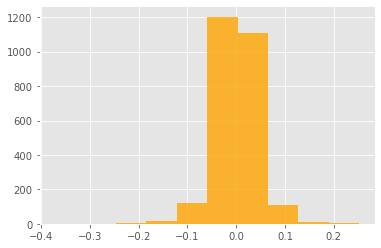

In [75]:
# Histogram for Bitcoin
returns.BTC.hist(alpha=.8,color='orange')

In [76]:
print("mean : ", returns.BTC.mean())
print("vol : ", returns.BTC.std())
print("skew : ", returns.BTC.skew())
print("kurt : ", returns.BTC.kurtosis())

mean :  0.00265241659389052
vol :  0.03917753249856483
skew :  -0.16334168147935763
kurt :  7.367732047025818


In [77]:
# Sharpe Ratio (using only downside risk)
(returns.BTC.mean() - rf) / returns.BTC.std()

0.054940075513162254

In [78]:
# Sortino Ratio (using only downside risk)
(returns.BTC.mean() - rf) / returns.BTC[returns.BTC<0].std()

0.07153522099088251

###### ETC

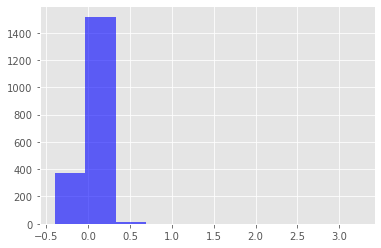

In [79]:
# Histogram for Ethereum
returns.ETC.hist(alpha=.6,color='blue')

In [80]:
print("mean : ", returns.ETC.mean())
print("vol : ", returns.ETC.std())
print("skew : ", returns.ETC.skew())
print("kurt : ", returns.ETC.kurtosis())

mean :  0.0054634955226703094
vol :  0.10180374637464232
skew :  17.147687459557826
kurt :  536.9309735039699


In [81]:
# Sharpe Ratio (using only downside risk)
(returns.ETC.mean() - rf) / returns.ETC.std()

0.04875552913744869

In [82]:
# Sortino Ratio (using only downside risk)
(returns.ETC.mean() - rf) / returns.ETC[returns.ETC<0].std()

0.10594433734741382

## Drawdown (max % loss from a mkt peak)

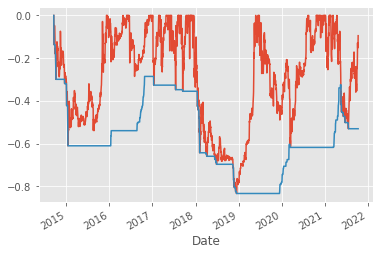

In [83]:
# Maximum value of price every year
roll_max = df.BTC.rolling(min_periods=1,window=365).max()

# daily draw-down
drawdown = df.BTC/roll_max - 1.

# max daily draw-down
max_drawdown = drawdown.rolling(min_periods=1,window=365).min()

# Plot
drawdown.plot()
max_drawdown.plot()
plt.show()


In [84]:
df.BTC

Date
2014-09-17      457.334015
2014-09-18      424.440002
2014-09-19      394.795990
2014-09-20      408.903992
2014-09-21      398.821014
                  ...     
2021-10-07    53805.984375
2021-10-08    53967.847656
2021-10-09    54968.222656
2021-10-10    54771.578125
2021-10-11    57484.789062
Name: BTC, Length: 2578, dtype: float64

## CAPM

In [85]:
start = dt.datetime(2013, 1, 1)
end =   dt.datetime(2021, 10, 11)

rf_ts = yf.download('^IRX',start,end,interval='1d')['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [86]:
rf_ts = pd.DataFrame(rf_ts)
rf_ts = rf_ts.rename({'Adj Close':'Rf'})

In [87]:
rf_ts.columns = ['Rf']

In [88]:
rf_ts

,Rf
Date,
2013-01-02,0.055
2013-01-03,0.065
2013-01-04,0.065
2013-01-07,0.058
2013-01-08,0.060
...,...
2021-09-28,0.030
2021-09-30,0.028
2021-10-01,0.028


In [89]:
rf_returns = rf_ts.pct_change()
rf_returns.head(2)

,Rf
Date,
2013-01-02,NaN
2013-01-03,0.181818


##### merging data

In [90]:
df = df.join(rf_ts,how='left')
df[['Rf']].head()

,Rf
Date,
2014-09-17,0.013
2014-09-18,0.010
2014-09-19,0.007
2014-09-20,NaN
2014-09-21,NaN


In [91]:
# filling missing data (i.e. weekends)
for i in range(0,len(df.index)):
    if pd.isnull(df['Rf'][i]) == True:
        df['Rf'][i] = df['Rf'][i-1]

In [92]:
df[['Rf']].head()

,Rf
Date,
2014-09-17,0.013
2014-09-18,0.010
2014-09-19,0.007
2014-09-20,0.007
2014-09-21,0.007


In [93]:
df[['Rf']].tail()

,Rf
Date,
2021-10-07,0.04
2021-10-08,0.04
2021-10-09,0.04
2021-10-10,0.04
2021-10-11,0.04


#### Returns

In [94]:
returns = df.pct_change()

In [95]:
returns = returns[1:]

### BTC

In [96]:
y = returns.BTC - returns.Rf #; y=y[1:]
x = returns.MktCap - returns.Rf #; x=x[1:]

btc_beta = sm.OLS(endog=y,exog=x,hasconst=False).fit()

In [97]:
btc_beta.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                          3.372e+05
Date:                Tue, 12 Oct 2021   Prob (F-statistic):                        0.00
Time:                        11:33:52   Log-Likelihood:                          4475.2
No. Observations:                2577   AIC:                                     -8948.
Df Residuals:                    2576   BIC:                                     -8943.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9949      0.002    580.700      0.000       0.991       0.998
==============================================================================
Omnibus:                      386.174   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4371.360
Skew:                          -0.314   Prob(JB):                         0.00
Kurtosis:                       9.350   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

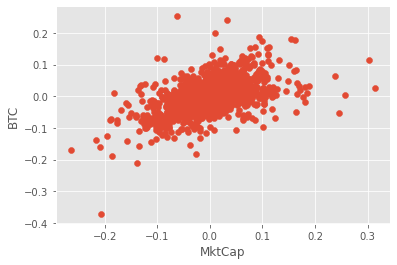

In [98]:
fig, ax = subplots()
ax.scatter(returns.MktCap,returns.BTC)
ax.set_xlabel("MktCap")
ax.set_ylabel("BTC")
show()

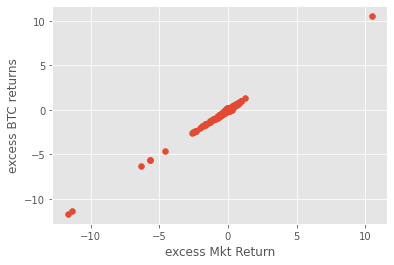

In [99]:
fig, ax = subplots()
ax.scatter(x,y)
ax.set_xlabel("excess Mkt Return")
ax.set_ylabel("excess BTC returns")
show()

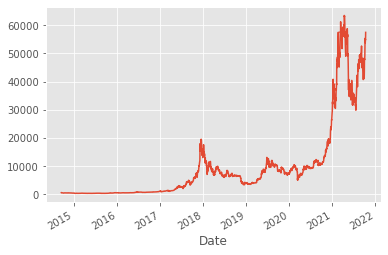

In [100]:
df.BTC.plot()

#### Rolling Volatility

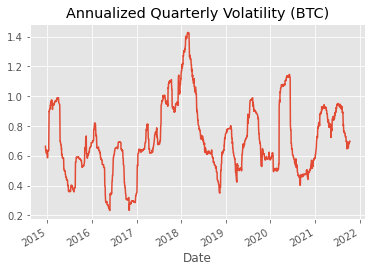

In [158]:
(returns.BTC.rolling(90).std()*np.sqrt(365)).plot(title='Annualized Quarterly Volatility (BTC)')

#### Rolling Beta

In [101]:
years = df.index.year.nunique()
years

8

In [102]:
fy = df.index.year[0]
ly = df.index.year[-1]
(fy,ly)

(2014, 2021)

In [103]:
df.index.year.drop_duplicates().values

array([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021], dtype=int64)

In [104]:
BTC_Betas = pd.DataFrame(index=df.index.year.drop_duplicates().values,
                        columns=['Beta'])
BTC_Betas

,Beta
2014,NaN
2015,NaN
2016,NaN
2017,NaN
2018,NaN
2019,NaN
2020,NaN
2021,NaN


In [105]:
df.BTC[df.index.year==2014]

Date
2014-09-17    457.334015
2014-09-18    424.440002
2014-09-19    394.795990
2014-09-20    408.903992
2014-09-21    398.821014
                 ...    
2014-12-27    315.863007
2014-12-28    317.239014
2014-12-29    312.670013
2014-12-30    310.737000
2014-12-31    320.192993
Name: BTC, Length: 106, dtype: float64

In [106]:
list(BTC_Betas.loc[2014,:])

[nan]

In [107]:
for Year in BTC_Betas.index:
    y = returns.BTC[returns.index.year==Year] - returns.Rf[returns.index.year==Year]
    x = returns.MktCap[returns.index.year==Year] - returns.Rf[returns.index.year==Year]
    
    BTC_Betas.loc[Year,'Beta'] = sm.OLS(endog=y,exog=x,hasconst=False).fit().params[0]

In [108]:
BTC_Betas

,Beta
2014,0.998484
2015,0.998383
2016,0.812918
2017,0.348125
2018,0.479612
2019,0.735202
2020,1.00205
2021,0.952851


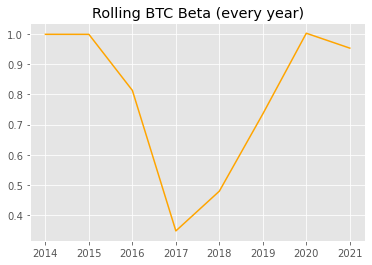

In [109]:
BTC_Betas.Beta.plot(title='Rolling BTC Beta (every year)',color='orange')

### ETC

### PyFolio

##### manually installing Pyfolio

In [110]:
import pyfolio as pf

In [111]:
import empyrical

In [112]:
pf.create_returns_tear_sheet(returns.BTC)

Start date,2014-09-18
End date,2021-10-11
Total months,122
,Backtest
Annual return,60.4%
Cumulative returns,12469.5%
Annual volatility,62.2%
Sharpe ratio,1.07
Calmar ratio,0.72
Stability,0.89
Max drawdown,-83.4%


AttributeError: 'numpy.int64' object has no attribute 'to_pydatetime'

-2062

In [198]:
index_outsample = round((len(returns.index)*.8))

out_of_sample = returns.index[index_outsample]
out_of_sample

Timestamp('2020-05-12 00:00:00')

In [199]:
pf.create_bayesian_tear_sheet(returns.iloc[:,:-2], live_start_date=out_of_sample)

TypeError: Cannot compare tz-naive and tz-aware datetime-like objects.

## Portfolio Optimization via PyPortfolioOpt

In [113]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [ ]:
# No MarketCap or Rf
df.iloc[:,:-2]

In [139]:
# Calculate expected annualized returns and risk
mu = expected_returns.mean_historical_return(df.iloc[:,:-2], frequency=365)
Sigma = risk_models.sample_cov(df.iloc[:,:-2], frequency=365)

In [210]:
df.iloc[:,:-2].pct_change().mean()*365

ADA       2.155773
ALGO      1.771426
ATOM1     1.624285
AVAX      3.315279
BCH       1.094814
BNB       2.990612
BTC       0.968132
DOGE      2.050982
DOT1      3.334575
EGLD      3.654976
ETC       1.994176
ETH       1.949746
FIL       3.103273
HEX      10.521266
ICP1     -1.018898
LINK      2.327412
LTC       1.110604
LUNA1     3.085614
MATIC    11.354254
SOL1      4.742745
THETA     2.078179
TRX       2.303062
UNI3      8.738308
USDC      0.002904
USDT      0.026909
VET       1.525054
XLM       1.695978
XMR       1.475691
XRP       1.654215
XTZ       1.305902
dtype: float64

In [209]:
expected_returns.mean_historical_return(df.iloc[:,:-2], frequency=1,compounding=False)

ADA      0.005906
ALGO     0.004853
ATOM1    0.004450
AVAX     0.009083
BCH      0.002999
BNB      0.008193
BTC      0.002652
DOGE     0.005619
DOT1     0.009136
EGLD     0.010014
ETC      0.005463
ETH      0.005342
FIL      0.008502
HEX      0.028825
ICP1    -0.002792
LINK     0.006376
LTC      0.003043
LUNA1    0.008454
MATIC    0.031108
SOL1     0.012994
THETA    0.005694
TRX      0.006310
UNI3     0.023941
USDC     0.000008
USDT     0.000074
VET      0.004178
XLM      0.004647
XMR      0.004043
XRP      0.004532
XTZ      0.003578
dtype: float64

In [151]:
mu

ADA       2.038226
ALGO      1.202528
ATOM1     0.857984
AVAX      6.083291
BCH       0.093490
BNB       6.145656
BTC       0.983090
DOGE      1.605599
DOT1      7.802585
EGLD     10.259176
ETC       1.181824
ETH       2.186608
FIL       0.623715
HEX      72.296588
ICP1     -0.921970
LINK      2.349048
LTC       0.657747
LUNA1     4.841974
MATIC     9.024765
SOL1     27.962332
THETA     1.571696
TRX       1.601124
UNI3      4.729845
USDC     -0.000605
USDT     -0.028419
VET       0.855151
XLM       0.951345
XMR       1.045667
XRP       1.133710
XTZ       0.387830
dtype: float64

In [ ]:
Sigma

In [173]:
# Obtain the EfficientFrontier
ef = EfficientFrontier(mu, Sigma,weight_bounds=(0,1)) # weight_bounds=(-1,1) for short positions

In [ ]:
type(ef)

In [174]:
# optimal portfolio Weights
max_sharpe_port_weights = ef.max_sharpe()
display(max_sharpe_port_weights)

# expected return, volatility and Sharpe ratio for the optimized portfolio.
max_sharpe_port = pd.DataFrame(ef.portfolio_performance(),
                               index=['E(return)','vol','SharpeRatio'],
                               columns=['OptPort'])
max_sharpe_port

OrderedDict([('ADA', 0.0),
             ('ALGO', 0.0),
             ('ATOM1', 0.0),
             ('AVAX', 0.0),
             ('BCH', 0.0),
             ('BNB', 0.0),
             ('BTC', 0.0),
             ('DOGE', 0.0),
             ('DOT1', 0.0),
             ('EGLD', 0.0148558404659591),
             ('ETC', 0.0),
             ('ETH', 0.0),
             ('FIL', 0.0),
             ('HEX', 0.1794080548425217),
             ('ICP1', 0.0),
             ('LINK', 0.0),
             ('LTC', 0.0),
             ('LUNA1', 0.0),
             ('MATIC', 0.0),
             ('SOL1', 0.8057361046915191),
             ('THETA', 0.0),
             ('TRX', 0.0),
             ('UNI3', 0.0),
             ('USDC', 0.0),
             ('USDT', 0.0),
             ('VET', 0.0),
             ('XLM', 0.0),
             ('XMR', 0.0),
             ('XRP', 0.0),
             ('XTZ', 0.0)])

,OptPort
E(return),35.653260
vol,1.713001
SharpeRatio,20.801662


,OptPort
E(return),1.020000
vol,0.147893
SharpeRatio,6.761663


In [176]:
# Select the minimum volatility portfolio
min_vol_port_weights = ef.min_volatility()
display(min_vol_port_weights)

# expected return, volatility and Sharpe ratio for the optimized portfolio.
min_vol_port = pd.DataFrame(ef.portfolio_performance(),
                            index=['E(return)','vol','SharpeRatio'],
                            columns=['OptPort'])
min_vol_port

OrderedDict([('ADA', 0.0),
             ('ALGO', 0.0),
             ('ATOM1', 0.0),
             ('AVAX', 0.0),
             ('BCH', 0.0),
             ('BNB', 0.0006707377971998),
             ('BTC', 0.0044119310527189),
             ('DOGE', 0.0),
             ('DOT1', 0.0),
             ('EGLD', 0.0016703965577554),
             ('ETC', 0.0),
             ('ETH', 0.0),
             ('FIL', 0.0),
             ('HEX', 0.0047950442701577),
             ('ICP1', 0.0),
             ('LINK', 0.0),
             ('LTC', 0.0),
             ('LUNA1', 0.0),
             ('MATIC', 0.0),
             ('SOL1', 0.0232017790150088),
             ('THETA', 0.0),
             ('TRX', 0.0),
             ('UNI3', 7.59900089618e-05),
             ('USDC', 0.9359447467084214),
             ('USDT', 0.0292293745897762),
             ('VET', 0.0),
             ('XLM', 0.0),
             ('XMR', 0.0),
             ('XRP', 0.0),
             ('XTZ', 0.0)])

,OptPort
E(return),1.020000
vol,0.096846
SharpeRatio,10.325711


In [ ]:
# Optimal return for a target risk
ef.efficient_risk(2.3)

In [127]:
# Obtain the performance numbers
ef.portfolio_performance(verbose=True, risk_free_rate = 0.05)

Expected annual return: 102.0%
Annual volatility: 14.8%
Sharpe Ratio: 6.76


C:\Users\Public\anaconda3\lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:409: UserWarning: The risk_free_rate provided to portfolio_performance is different to the one used by max_sharpe. Using the previous value.
  warnings.warn(


(1.02, 0.14789261387997976, 6.76166289691476)

In [128]:
# Get interpretable weights
ef.clean_weights()

OrderedDict([('ADA', 0.0),
             ('ALGO', 0.0),
             ('ATOM1', 0.0),
             ('AVAX', 0.0),
             ('BCH', 0.0),
             ('BNB', 0.0),
             ('BTC', 0.0),
             ('DOGE', 0.0),
             ('DOT1', 0.0),
             ('EGLD', 0.01476),
             ('ETC', 0.0),
             ('ETH', 0.0),
             ('FIL', 0.0),
             ('HEX', 0.01339),
             ('ICP1', 0.0),
             ('LINK', 0.0),
             ('LTC', 0.0),
             ('LUNA1', 0.0),
             ('MATIC', 0.0),
             ('SOL1', 0.07707),
             ('THETA', 0.0),
             ('TRX', 0.0),
             ('UNI3', 0.0),
             ('USDC', 0.87377),
             ('USDT', 0.02084),
             ('VET', 0.0),
             ('XLM', 0.0),
             ('XMR', 0.0),
             ('XRP', 0.0),
             ('XTZ', 0.0)])

In [129]:
from pypfopt import *

Portfolio optimization relies upon an unbiased and efficient estimate of asset covariance. Although sample covariance is unbiased, it is not efficient--extreme events tend to be overweighted.

One approach to alleviate this is through "covariance shrinkage", where large errors are reduced ('shrunk') to improve efficiency. Here it is use pypfopt.risk_models's CovarianceShrinkage object to transform sample covariance into an efficient estimate. The textbook error shrinkage method, .ledoit_wolf(), is a method of this object.

In [141]:
CovarianceShrinkage(df.iloc[:,:-2],frequency=365).ledoit_wolf()

,ADA,ALGO,ATOM1,AVAX,BCH,BNB,BTC,DOGE,DOT1,EGLD,...,THETA,TRX,UNI3,USDC,USDT,VET,XLM,XMR,XRP,XTZ
ADA,4.136724,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ALGO,0.000000,4.136724,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ATOM1,0.000000,0.000000,4.136724,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AVAX,0.000000,0.000000,0.000000,4.136724,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BCH,0.000000,0.000000,0.000000,0.000000,4.136724,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BNB,0.000000,0.000000,0.000000,0.000000,0.000000,4.136724,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BTC,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.136724,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DOGE,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.136724,0.000000,0.000000,...,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DOT1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.136724,0.000000,...,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
EGLD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.136724,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [142]:
# Constrained Linear Algorithm
cla = CLA(mu,Sigma)

In [159]:
cla.max_sharpe()

OrderedDict([('ADA', 0.0),
             ('ALGO', 0.0),
             ('ATOM1', 0.0),
             ('AVAX', 0.0),
             ('BCH', 0.0),
             ('BNB', 0.0),
             ('BTC', 0.0),
             ('DOGE', 0.0),
             ('DOT1', 0.0),
             ('EGLD', 0.015363634903224715),
             ('ETC', 0.0),
             ('ETH', 0.0),
             ('FIL', 0.0),
             ('HEX', 0.17928142870409747),
             ('ICP1', 0.0),
             ('LINK', 0.0),
             ('LTC', 0.0),
             ('LUNA1', 0.0),
             ('MATIC', 0.0),
             ('SOL1', 0.8053549363926777),
             ('THETA', 0.0),
             ('TRX', 0.0),
             ('UNI3', 0.0),
             ('USDC', 5.395162948669821e-17),
             ('USDT', 0.0),
             ('VET', 0.0),
             ('XLM', 0.0),
             ('XMR', 0.0),
             ('XRP', 0.0),
             ('XTZ', 0.0)])

In [134]:
cla.min_volatility()

OrderedDict([('ADA', 0.0),
             ('ALGO', 0.002627306983083262),
             ('ATOM1', 0.0),
             ('AVAX', 0.0),
             ('BCH', 0.0007435923421690892),
             ('BNB', 0.0),
             ('BTC', 0.013703652297017092),
             ('DOGE', 0.0),
             ('DOT1', 0.0),
             ('EGLD', 0.0),
             ('ETC', 3.3390648504941354e-05),
             ('ETH', 0.001972396879424742),
             ('FIL', 0.0),
             ('HEX', 0.0),
             ('ICP1', 0.0),
             ('LINK', 0.0),
             ('LTC', 0.0),
             ('LUNA1', 0.0),
             ('MATIC', 0.0),
             ('SOL1', 0.0),
             ('THETA', 0.0),
             ('TRX', 0.0),
             ('UNI3', 6.163813259283486e-05),
             ('USDC', 0.9475456299762633),
             ('USDT', 0.031541173161431915),
             ('VET', 0.0),
             ('XLM', 0.0017712195795127096),
             ('XMR', 0.0),
             ('XRP', 0.0),
             ('XTZ', 0.0)])

### Plotting

In [152]:
cla_ef = pd.DataFrame(cla.efficient_frontier(points=100),index=['PortReturn','PortVol','PortWeights'])
cla_ef

,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,70
PortReturn,72.2966,72.2966,72.2966,72.2966,72.2966,72.2966,65.0534,57.8101,50.5669,43.3237,...,0.0848553,0.0691385,0.0534218,0.037705,0.0219882,0.0219026,0.0218169,0.0217313,0.0216457,0.0215601
PortVol,5.64276,5.64276,5.64276,5.64276,5.64276,5.64276,4.73726,3.85468,3.01522,2.26729,...,0.084098,0.0840559,0.0840199,0.0839903,0.0839668,0.0839667,0.0839666,0.0839666,0.0839666,0.0839666
PortWeights,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....",...,"[[0.0], [0.00223760720579453], [0.0], [0.0], [...","[[0.0], [0.0023321453084296138], [0.0], [0.0],...","[[0.0], [0.002426683411064698], [0.0], [0.0], ...","[[0.0], [0.0025212215136997825], [0.0], [0.0],...","[[0.0], [0.002615759616334867], [0.0], [0.0], ...","[[0.0], [0.002618069089684645], [0.0], [0.0], ...","[[0.0], [0.002620378563034423], [0.0], [0.0], ...","[[0.0], [0.002622688036384201], [0.0], [0.0], ...","[[0.0], [0.002624997509733979], [0.0], [0.0], ...","[[0.0], [0.002627306983083757], [0.0], [0.0], ..."


In [177]:
max_sharpe_port

,OptPort
E(return),35.653260
vol,1.713001
SharpeRatio,20.801662


In [178]:
min_vol_port

,OptPort
E(return),1.020000
vol,0.096846
SharpeRatio,10.325711


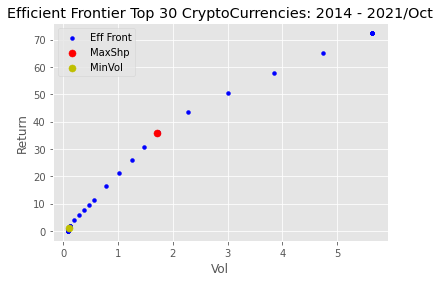

In [187]:
plt.title('Efficient Frontier Top 30 CryptoCurrencies: 2014 - 2021/Oct')

plt.scatter(cla_ef.loc['PortVol'],cla_ef.loc['PortReturn'],s =15,c ='b',label = 'Eff Front')
plt.scatter(max_sharpe_port.loc['vol'],max_sharpe_port.loc['E(return)'],s =50, c='r',label = 'MaxShp')
plt.scatter(min_vol_port.loc['vol'],min_vol_port.loc['E(return)'],s =50, c='y',label = 'MinVol')
            
            
plt.xlabel('Vol')
plt.ylabel('Return')
plt.legend()

plt.show()

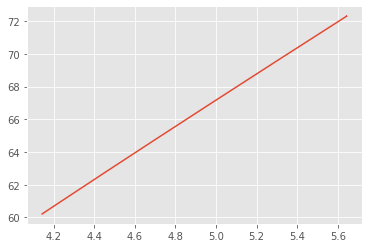

In [166]:
ef = EfficientFrontier(mu, Sigma)
rets = []
stds = []
for risk_aversion in np.arange(0.0005, 2, 0.01):
    ef.max_quadratic_utility(risk_aversion)
    ret, sigma, _ = ef.portfolio_performance()
    rets.append(ret)
    stds.append(sigma)

plt.plot(stds, rets)

## Redo Analysis by Year

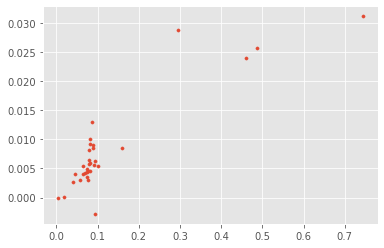

In [206]:
plt.scatter(returns.std(),returns.mean(),s=10)

## Export

In [202]:
import xlsxwriter

In [203]:
writer = pd.ExcelWriter('crypto_price_hist.xlsx', engine='xlsxwriter')
df.to_excel(writer, sheet_name= 'Sheet1', index=True)
writer.save()